In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/deeplearning/course_work1')
os.getcwd()

'/content/drive/My Drive/deeplearning/course_work1'

In [ ]:
import tensorflow as tf 
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report
from tensorflow.keras.applications import ResNet50, ResNet50V2, DenseNet201, MobileNet, MobileNetV2
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Nadam, Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, UpSampling2D, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import Dropout
from keras.datasets import cifar100, cifar10
from keras.utils import print_summary, to_categorical
import numpy as np
import cv2
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
(list_image, labels), (x_test, y_test) = cifar100.load_data()
x_train, x_val, y_train, y_val = train_test_split(list_image, labels, test_size=0.2, random_state=42)

In [ ]:
NUM_CLASSES = 100
y_train = to_categorical(y_train, NUM_CLASSES)
y_val = to_categorical(y_val, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.
x_val = x_val/255.
x_test = x_test/255.
print(x_train.shape, x_val.shape, x_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
new_model = tf.keras.models.load_model('densenet_cifar100.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) multiple                  0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 multiple                  0         
_________________________________________________________________
densenet201 (Model)          (None, 4, 4, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d (Gl multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  983552    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  5

In [ ]:
loss,acc = new_model.evaluate(x_test,  y_test)
print("Loss: {:5.2f}, Accuracy: {:5.2f}%".format(loss,100*acc))

313/313 [==============================] - 16s 52ms/step - loss: 0.8320 - accuracy: 0.8360
Loss:  0.83, Accuracy: 83.60%


In [ ]:
target_names = np.array(['class' + str(i) for i in range(100)])
target_names[:3]

array(['class0', 'class1', 'class2'], dtype='<U7')

In [ ]:
predictions = new_model.predict(x_test, batch_size=128, verbose=1)

79/79 [==============================] - 14s 173ms/step


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
label_test = np.argmax(y_test, axis=1)
print(classification_report(label_test, predicted_classes, 
        target_names=target_names, digits = 6))

              precision    recall  f1-score   support

      class0   0.936842  0.890000  0.912821       100
      class1   0.928571  0.910000  0.919192       100
      class2   0.728261  0.670000  0.697917       100
      class3   0.740000  0.740000  0.740000       100
      class4   0.754902  0.770000  0.762376       100
      class5   0.837838  0.930000  0.881517       100
      class6   0.934783  0.860000  0.895833       100
      class7   0.870000  0.870000  0.870000       100
      class8   0.884615  0.920000  0.901961       100
      class9   0.948980  0.930000  0.939394       100
     class10   0.800000  0.720000  0.757895       100
     class11   0.500000  0.650000  0.565217       100
     class12   0.836364  0.920000  0.876190       100
     class13   0.841584  0.850000  0.845771       100
     class14   0.853211  0.930000  0.889952       100
     class15   0.824074  0.890000  0.855769       100
     class16   0.888889  0.880000  0.884422       100
     class17   0.895238  0.

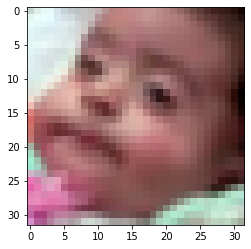

In [ ]:
ids = np.where(label_test == 2 )
plt.imshow(x_test[ids[0][0]].reshape(32,32,3))
